In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1309,ham,"Ok, be careful ! Don't text and drive !",NaN,NaN,NaN
2557,spam,This message is brought to you by GMW Ltd. and...,NaN,NaN,NaN
3260,ham,Yup i'm still having coffee wif my frens... My...,NaN,NaN,NaN
432,spam,Congrats! Nokia 3650 video camera phone is you...,NaN,NaN,NaN
5544,ham,"I'm taking derek &amp; taylor to walmart, if I...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### 1. Data Celaning

In [9]:
# data cleaning

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.rename(columns={'v1':'Targets', 'v2': 'Text'}, inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['Targets'] = encoder.fit_transform(df['Targets'])

In [14]:
df

,Targets,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
# missing values 

df.isnull().sum()

Targets    0
Text       0
dtype: int64

In [16]:
# check for duplicates

df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep = 'first')

In [18]:
df.duplicated().sum()

0

In [19]:
df

,Targets,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### 2.EDA 

In [20]:
df['Targets'].value_counts()

Targets
0    4516
1     653
Name: count, dtype: int64

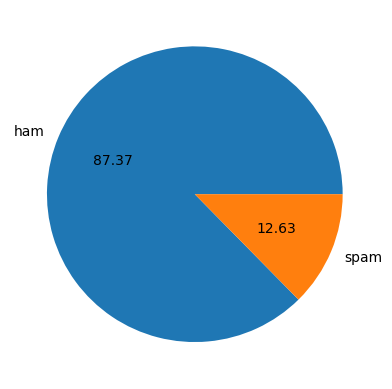

In [21]:
import matplotlib.pyplot as plt

plt.pie(df['Targets'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [22]:
# Data is imbalanced

In [23]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [24]:
import nltk #natural language tool kit
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrroh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mrroh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
# number of characters in the sentence

df['num_characters']=df['Text'].apply(len)

C:\Users\mrroh\AppData\Local\Temp\ipykernel_23928\1683980532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Text'].apply(len)


In [27]:
df.head()

,Targets,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words per sms

df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\mrroh\AppData\Local\Temp\ipykernel_23928\38253748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [29]:
df.head()

,Targets,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# num of sentence per sms

df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\mrroh\AppData\Local\Temp\ipykernel_23928\4195120375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [31]:
df

,Targets,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [32]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# ham
df[df['Targets'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#spam
df[df['Targets'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

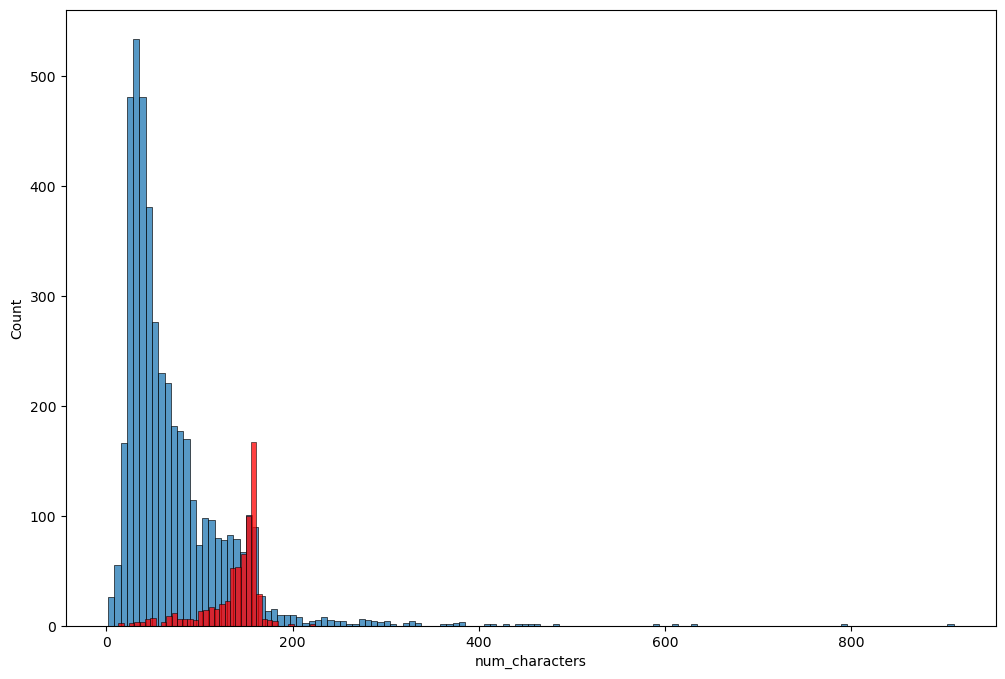

In [35]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(df[df['Targets'] == 0]['num_characters']) #ham
sns.histplot(df[df['Targets'] == 1]['num_characters'], color = 'red') #spam

<Axes: xlabel='num_words', ylabel='Count'>

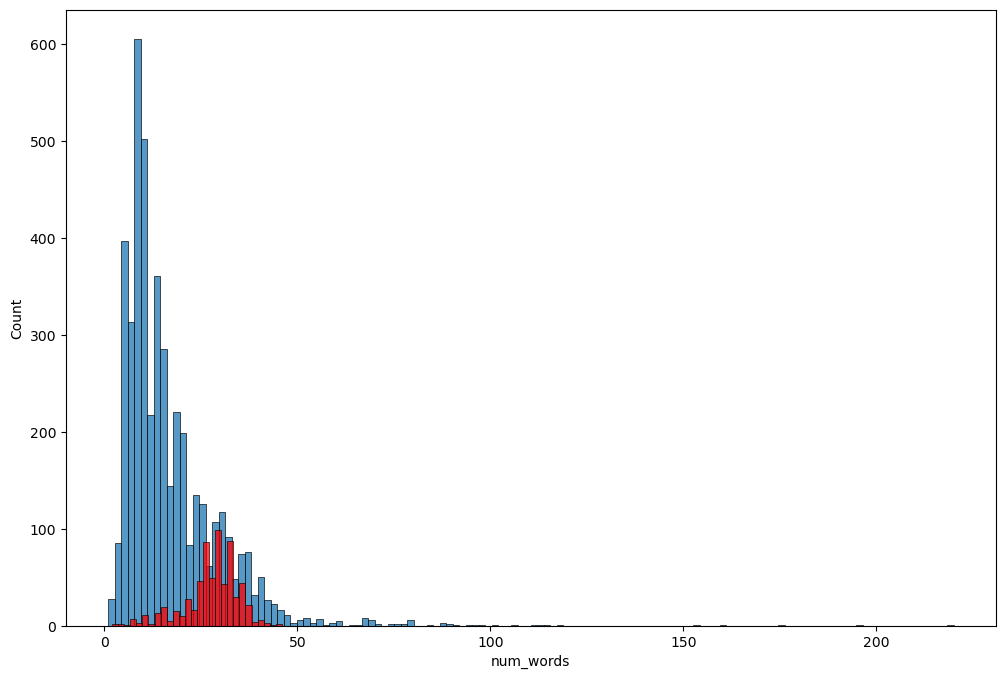

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Targets'] == 0]['num_words']) #ham
sns.histplot(df[df['Targets'] == 1]['num_words'], color = 'red') #spam

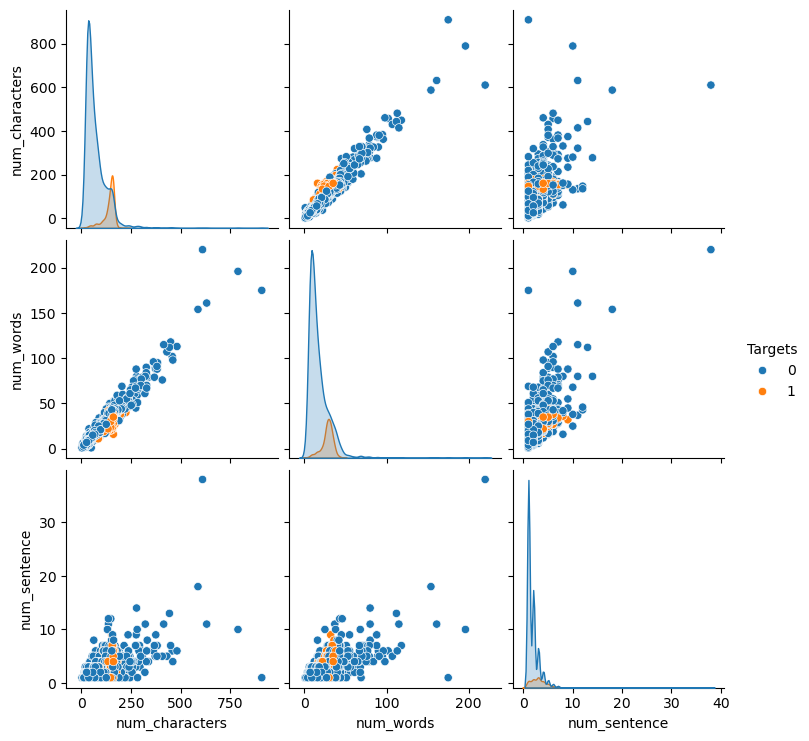

In [37]:
sns.pairplot(df, hue= 'Targets')

In [38]:
df.head()

,Targets,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

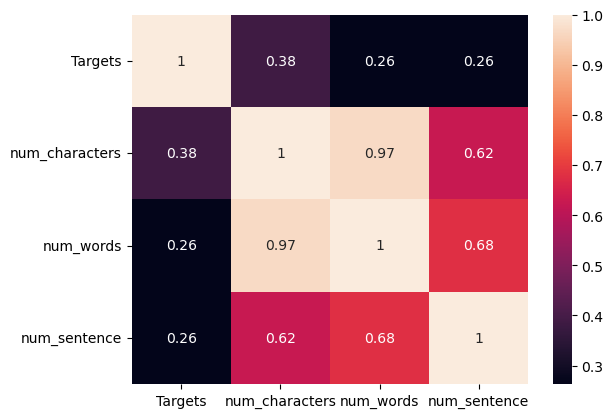

In [39]:
sns.heatmap(df[['Targets','num_characters', 'num_words', 'num_sentence']].corr(), annot =True)

### 3.Data preprocessing (text preprocessing)
- lower case
- tokenization
- removing special characters
- removing stop words and punctuation
- stemming

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    
            
    return " ".join(y)
            
            
            
        
    
    
    
    
    
    

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrroh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('lobing')

'lobe'

In [45]:
df['transformed_text'] = df['Text'].apply(transform_text)

C:\Users\mrroh\AppData\Local\Temp\ipykernel_23928\1893880433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['Text'].apply(transform_text)


In [46]:
df.drop(columns = ['transform_text'], inplace = True)

KeyError: "['transform_text'] not found in axis"

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width= 500, height= 500, min_font_size = 10 , background_color = 'white' )

In [ ]:
spam_wc = wc.generate(df[df['Targets'] ==1]['transformed_text'].str.cat(sep=' '))

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Targets'] ==0]['transformed_text'].str.cat(sep=' '))

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [ ]:
# let see the top 30 words from spams messages

spam_corpus= []
for msg in df[df['Targets']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
    

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
df_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x = df_spam_corpus[0], y = df_spam_corpus[1], data = df_spam_corpus, color = 'red')
plt.xticks(rotation ='vertical')

In [ ]:
df_spam_corpus[1]

In [ ]:
# let see the top 30 words in the ham corpus
ham_corpus = []
for msg in df[df["Targets"]== 0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
ham_corpus

In [ ]:
df_ham_corpus = pd.DataFrame(Counter(ham_corpus).most_common(30))
df_ham_corpus

sns.barplot(x = df_ham_corpus[0], y = df_ham_corpus[1], data = df_ham_corpus)
plt.xticks(rotation='vertical')

### 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.preprocessing import MinMaxScaler # beacuse it give us scale value between 0 and 1
# scaler = MinMaxScaler()
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X

In [441]:
X.shape

(5169, 3000)

In [442]:
y = df['Targets'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [443]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,)


In [444]:
X_train.shape

(4135, 3000)

In [445]:
X_test.shape

(1034, 3000)

In [446]:
y_train.shape

(4135,)

In [447]:
y_test.shape

(1034,)

In [448]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [449]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [450]:


bnb.fit(X_train, y_train)


BernoulliNB()

In [452]:
gnb.fit(X_train, y_train)

GaussianNB()

In [453]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [454]:
y_pred1 = gnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = bnb.predict(X_test)

In [455]:
y_test.shape

(1034,)

In [456]:
y_pred1.shape

(1034,)

In [457]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [458]:
print('GaussionNB')
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

GaussionNB
0.8636363636363636
[[782 132]
 [  9 111]]
0.4567901234567901


In [459]:
print('MultinomialNB')
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

MultinomialNB
0.9835589941972921
[[913   1]
 [ 16 104]]
0.9904761904761905


In [460]:
print('BernoulliNB')
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

BernoulliNB
0.9912959381044487
[[913   1]
 [  8 112]]
0.9911504424778761


In [402]:
# tfidv --> mnb

In [403]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [227]:
!pip install XGboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 919.0 kB/s eta 0:02:44
   ---------------------------------------- 0.6/150.0 MB 5.1 MB/s eta 0:00:30
   ---------------------------------------- 1.4/150.0 MB 7.9 MB/s eta 0:00:19
    --------------------------------------- 2.2/150.0 MB 10.0 MB/s eta 0:00:15
    --------------------------------------- 2.9/150.0 MB 10.9 MB/s eta 0:00:14
    --------------------------------------- 3.7/150.0 MB 11.7 MB/s eta 0:00:13
   - -------------------------------------- 4.5/150.0 MB 12.5 MB/s eta 0:00:12
   - -------------------------------------- 5.4/150.0 MB 13.2 MB/s eta 0:00:11
   - -------------------------------------- 5.7/150.0 MB 12.5 MB/s eta 0:00:12

In [404]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [405]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [406]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [407]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.93)

In [408]:
print(type(accuracy_score))  # should say: <function ...>


<class 'function'>


In [409]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9787234042553191
Precision -  0.93
For  KN
Accuracy -  0.9303675048355899
Precision -  1.0
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9886363636363636
For  DT
Accuracy -  0.9545454545454546
Precision -  0.8588235294117647
For  LR
Accuracy -  0.965183752417795
Precision -  0.9186046511627907
For  RF
Accuracy -  0.9777562862669246
Precision -  0.9885057471264368
For  AdaBoost
Accuracy -  0.9429400386847195
Precision -  0.810126582278481
For  BgC
Accuracy -  0.9700193423597679
Precision -  0.8811881188118812
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9680851063829787
For  GBDT
Accuracy -  0.960348162475822
Precision -  0.9135802469135802
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9148936170212766


In [302]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [303]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.902321,1.000000
2,NB,0.948743,1.000000
5,RF,0.961315,1.000000
8,ETC,0.964217,1.000000
0,SVC,0.961315,0.968085
10,xgb,0.970986,0.962264
9,GBDT,0.950677,0.942529
4,LR,0.949710,0.941860
7,BgC,0.961315,0.885965
3,DT,0.936170,0.852273


In [304]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [305]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.902321
1,NB,Accuracy,0.948743
2,RF,Accuracy,0.961315
3,ETC,Accuracy,0.964217
4,SVC,Accuracy,0.961315
5,xgb,Accuracy,0.970986
6,GBDT,Accuracy,0.950677
7,LR,Accuracy,0.949710
8,BgC,Accuracy,0.961315
9,DT,Accuracy,0.936170


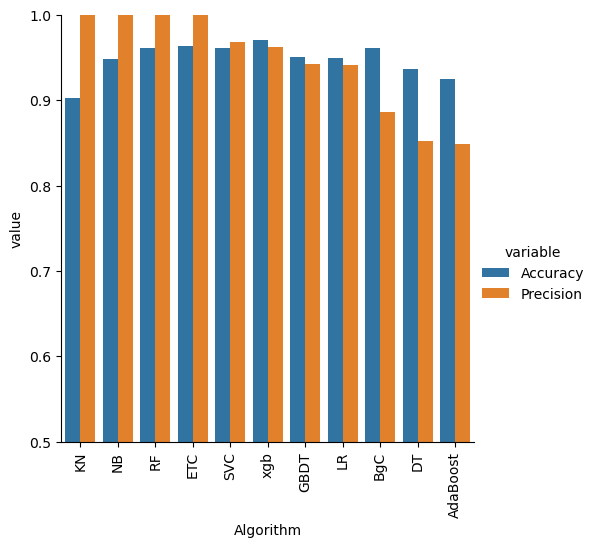

In [306]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [335]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [410]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [411]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.902321,1.000000,0.930368,1.000000
1,NB,0.948743,1.000000,0.978723,0.988636
2,RF,0.961315,1.000000,0.977756,0.988506
3,ETC,0.964217,1.000000,0.980658,0.968085
4,SVC,0.961315,0.968085,0.978723,0.930000
5,xgb,0.970986,0.962264,0.970986,0.914894
6,GBDT,0.950677,0.942529,0.960348,0.913580
7,LR,0.949710,0.941860,0.965184,0.918605
8,BgC,0.961315,0.885965,0.970019,0.881188
9,DT,0.936170,0.852273,0.954545,0.858824


In [412]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


from sklearn.ensemble import VotingClassifier

In [413]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [415]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [417]:
y_pred = voting.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print("Prescision", precision_score(y_test, y_pred))

Accuracy 0.9864603481624759
Prescision 0.9895833333333334


In [418]:
# appling stacking

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [419]:
from sklearn.ensemble import StackingClassifier

In [420]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [421]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9509803921568627


In [464]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [463]:
print("Fitting MultinomialNB...")
mnb.fit(X_train, y_train)
print("MultinomialNB fitted.")

y_pred2 = mnb.predict(X_test)


Fitting MultinomialNB...
MultinomialNB fitted.


In [465]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [466]:
import numpy as np

# Check for missing values in X_train, X_test, and y_train
print(np.any(np.isnan(X_train)))  # Returns True if any NaN value exists
print(np.any(np.isnan(X_test)))   # Returns True if any NaN value exists
print(np.any(np.isnan(y_train)))  # Returns True if any NaN value exists


False
False
False


In [467]:
print(X_train.shape)  # Ensure it matches expected dimensions
print(y_train.shape)  # Ensure it matches expected dimensions

# Example: Check if the model training works without issues
mnb.fit(X_train, y_train)
print("Model trained successfully!")


(4135, 3000)
(4135,)
Model trained successfully!
